In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [6]:
def build_alex_net(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.layers.Conv2D(
                96, (11, 11), strides=(4, 4), activation="relu", input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Conv2D(256, (5, 5), activation="relu"),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Conv2D(384, (3, 3), activation="relu"),
            keras.layers.Conv2D(384, (3, 3), activation="relu"),
            keras.layers.Conv2D(256, (3, 3), activation="relu"),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(preprocessing_utils.num_classes, activation="softmax"),
        ],
    )

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    model.summary()

    return model

In [7]:
alex_net_wrapper = ModelWrapper("AlexNet", preprocessing_utils=preprocessing_utils)

In [8]:
alex_net_wrapper.build_model(build_fn=build_alex_net, model_name=alex_net_wrapper.model_name)

Building model...
Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                         

In [9]:
alex_net_wrapper.train_evaluate_and_save_model()

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 49.0589 - accuracy: 0.0657
Epoch 1: val_loss improved from inf to 32.86937, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 18s 707ms/step - loss: 49.0589 - accuracy: 0.0657 - val_loss: 32.8694 - val_accuracy: 0.0599
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 25.3025 - accuracy: 0.0742
Epoch 2: val_loss improved from 32.86937 to 16.89129, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 499ms/step - loss: 25.3025 - accuracy: 0.0742 - val_loss: 16.8913 - val_accuracy: 0.0599
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 13.6306 - accuracy: 0.0657
Epoch 3: val_loss improved from 16.89129 to 10.20473, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 484ms/step - loss: 13.6306 - accuracy: 0.0657 - val_loss: 10.2047 - val_accuracy: 0.0599
Epoch 4/100
8/9 [=========================>....] - ETA: 0s - loss: 8.8902 - accuracy: 0.0785
Epoch 4: val_loss improved from 10.20473 to 7.44637, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 458ms/step - loss: 8.8560 - accuracy: 0.0788 - val_loss: 7.4464 - val_accuracy: 0.0645
Epoch 5/100
8/9 [=========================>....] - ETA: 0s - loss: 6.7726 - accuracy: 0.0920
Epoch 5: val_loss improved from 7.44637 to 6.04116, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 397ms/step - loss: 6.7535 - accuracy: 0.0924 - val_loss: 6.0412 - val_accuracy: 0.0553
Epoch 6/100
8/9 [=========================>....] - ETA: 0s - loss: 5.5370 - accuracy: 0.1037
Epoch 6: val_loss improved from 6.04116 to 5.30842, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 297ms/step - loss: 5.5269 - accuracy: 0.1034 - val_loss: 5.3084 - val_accuracy: 0.0369
Epoch 7/100
8/9 [=========================>....] - ETA: 0s - loss: 4.7978 - accuracy: 0.1125
Epoch 7: val_loss improved from 5.30842 to 4.59930, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 306ms/step - loss: 4.7876 - accuracy: 0.1138 - val_loss: 4.5993 - val_accuracy: 0.0783
Epoch 8/100
9/9 [==============================] - ETA: 0s - loss: 4.2907 - accuracy: 0.1265
Epoch 8: val_loss improved from 4.59930 to 4.12505, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 297ms/step - loss: 4.2907 - accuracy: 0.1265 - val_loss: 4.1250 - val_accuracy: 0.0968
Epoch 9/100
8/9 [=========================>....] - ETA: 0s - loss: 3.9666 - accuracy: 0.1280
Epoch 9: val_loss improved from 4.12505 to 4.03838, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 306ms/step - loss: 3.9611 - accuracy: 0.1284 - val_loss: 4.0384 - val_accuracy: 0.0691
Epoch 10/100
8/9 [=========================>....] - ETA: 0s - loss: 3.7068 - accuracy: 0.1545
Epoch 10: val_loss improved from 4.03838 to 3.69654, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 304ms/step - loss: 3.7032 - accuracy: 0.1542 - val_loss: 3.6965 - val_accuracy: 0.0922
Epoch 11/100
8/9 [=========================>....] - ETA: 0s - loss: 3.5253 - accuracy: 0.1552
Epoch 11: val_loss improved from 3.69654 to 3.53988, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 297ms/step - loss: 3.5232 - accuracy: 0.1554 - val_loss: 3.5399 - val_accuracy: 0.1152
Epoch 12/100
8/9 [=========================>....] - ETA: 0s - loss: 3.3921 - accuracy: 0.1675
Epoch 12: val_loss improved from 3.53988 to 3.49598, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 317ms/step - loss: 3.3881 - accuracy: 0.1688 - val_loss: 3.4960 - val_accuracy: 0.0968
Epoch 13/100
8/9 [=========================>....] - ETA: 0s - loss: 3.2814 - accuracy: 0.1667
Epoch 13: val_loss did not improve from 3.49598
9/9 [==============================] - 1s 156ms/step - loss: 3.2742 - accuracy: 0.1681 - val_loss: 3.5268 - val_accuracy: 0.1014
Epoch 14/100
8/9 [=========================>....] - ETA: 0s - loss: 3.1871 - accuracy: 0.1743
Epoch 14: val_loss improved from 3.49598 to 3.26405, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 300ms/step - loss: 3.1837 - accuracy: 0.1751 - val_loss: 3.2640 - val_accuracy: 0.1475
Epoch 15/100
8/9 [=========================>....] - ETA: 0s - loss: 3.0902 - accuracy: 0.1883
Epoch 15: val_loss did not improve from 3.26405
9/9 [==============================] - 1s 156ms/step - loss: 3.0912 - accuracy: 0.1856 - val_loss: 3.3134 - val_accuracy: 0.1198
Epoch 16/100
8/9 [=========================>....] - ETA: 0s - loss: 3.0520 - accuracy: 0.1850
Epoch 16: val_loss did not improve from 3.26405
9/9 [==============================] - 1s 150ms/step - loss: 3.0524 - accuracy: 0.1863 - val_loss: 3.3008 - val_accuracy: 0.1106
Epoch 17/100
8/9 [=========================>....] - ETA: 0s - loss: 2.9823 - accuracy: 0.2113
Epoch 17: val_loss did not improve from 3.26405
9/9 [==============================] - 1s 154ms/step - loss: 2.9881 - accuracy: 0.2102 - val_loss: 3.4042 - val_accuracy: 0.1198
Epoch 18/100
8/9 [=========================>....] - ETA: 0

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 308ms/step - loss: 2.9681 - accuracy: 0.2041 - val_loss: 3.1742 - val_accuracy: 0.0922
Epoch 19/100
8/9 [=========================>....] - ETA: 0s - loss: 2.8879 - accuracy: 0.2212
Epoch 19: val_loss did not improve from 3.17416
9/9 [==============================] - 1s 151ms/step - loss: 2.8898 - accuracy: 0.2206 - val_loss: 3.1788 - val_accuracy: 0.1244
Epoch 20/100
8/9 [=========================>....] - ETA: 0s - loss: 2.8035 - accuracy: 0.2432
Epoch 20: val_loss did not improve from 3.17416
9/9 [==============================] - 1s 150ms/step - loss: 2.7996 - accuracy: 0.2437 - val_loss: 3.4003 - val_accuracy: 0.1060
Epoch 21/100
8/9 [=========================>....] - ETA: 0s - loss: 2.7701 - accuracy: 0.2383
Epoch 21: val_loss improved from 3.17416 to 3.14064, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 2s 292ms/step - loss: 2.7687 - accuracy: 0.2391 - val_loss: 3.1406 - val_accuracy: 0.1382
Epoch 22/100
8/9 [=========================>....] - ETA: 0s - loss: 2.7071 - accuracy: 0.2615
Epoch 22: val_loss improved from 3.14064 to 3.10597, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 314ms/step - loss: 2.7056 - accuracy: 0.2615 - val_loss: 3.1060 - val_accuracy: 0.1613
Epoch 23/100
8/9 [=========================>....] - ETA: 0s - loss: 2.6530 - accuracy: 0.2848
Epoch 23: val_loss did not improve from 3.10597
9/9 [==============================] - 1s 151ms/step - loss: 2.6531 - accuracy: 0.2856 - val_loss: 3.1900 - val_accuracy: 0.1521
Epoch 24/100
8/9 [=========================>....] - ETA: 0s - loss: 2.5830 - accuracy: 0.3070
Epoch 24: val_loss did not improve from 3.10597
9/9 [==============================] - 1s 149ms/step - loss: 2.5836 - accuracy: 0.3070 - val_loss: 3.1531 - val_accuracy: 0.1336
Epoch 25/100
8/9 [=========================>....] - ETA: 0s - loss: 2.5820 - accuracy: 0.3203
Epoch 25: val_loss did not improve from 3.10597
9/9 [==============================] - 1s 152ms/step - loss: 2.5800 - accuracy: 0.3221 - val_loss: 3.1721 - val_accuracy: 0.1613
Epoch 26/100
8/9 [=========================>....] - ETA: 0

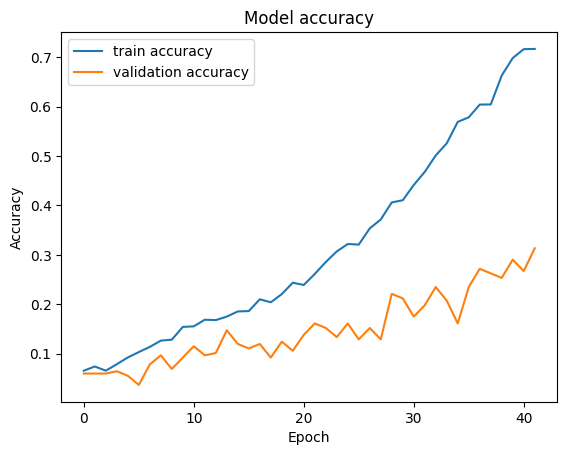

In [10]:
alex_net_wrapper.plot_accuracy()

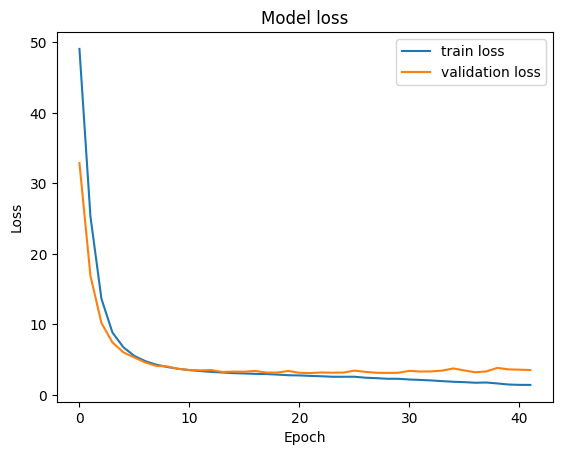

In [11]:
alex_net_wrapper.plot_loss()

20/20 [==============================] - 0s 8ms/step


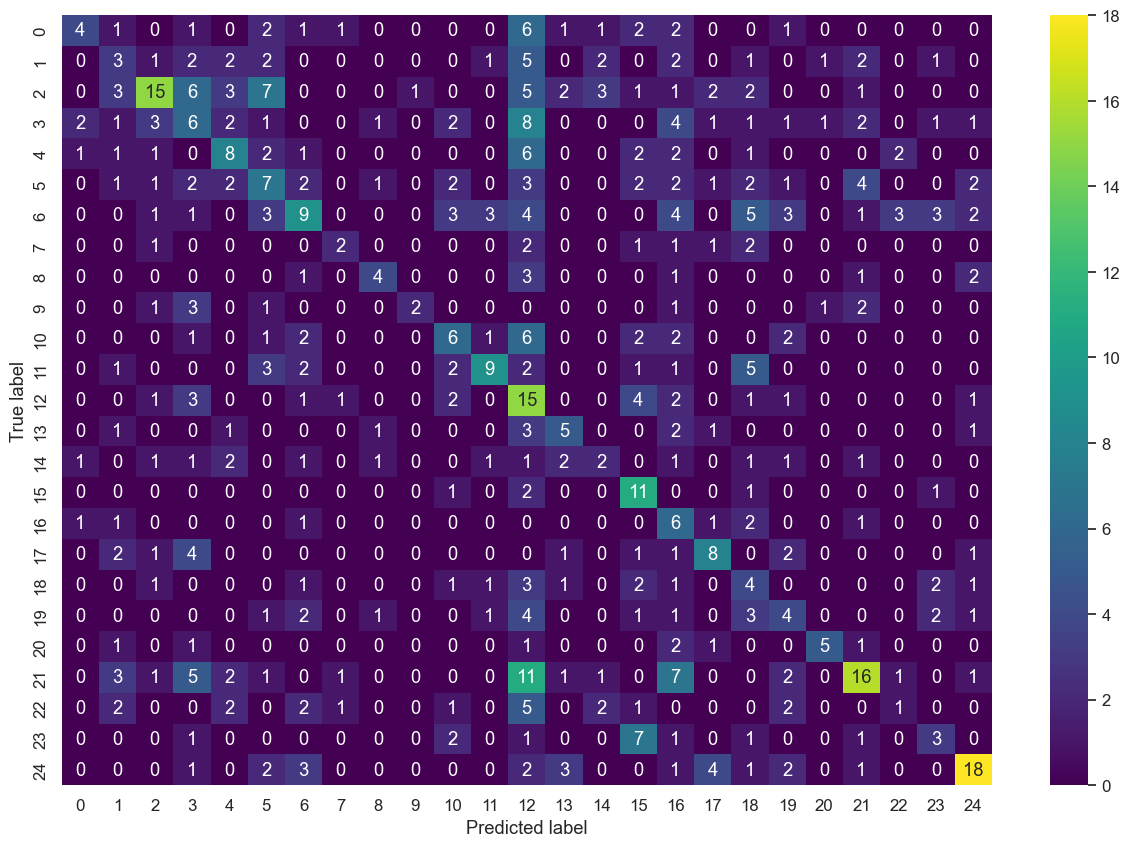

In [12]:
alex_net_wrapper.display_confusion_matrix()